# What Are the Good Places to Open a Laundry or Dry Cleaning Service In Munich

## Introduction / Business problem

Munich is the capital and most populous city of Bavaria With a population of 1,558,395 inhabitants as of July 31, 2020, it is the third-largest city in Germany, after Berlin and Hamburg, and thus the largest which does not constitute its own state, as well as the 11th-largest city in the European Union. It is well knownn that Munich is a great destination for tourists due to the variety of activities, lakes, parks and beer gardens to museums, historical sites and massive stores, there's something for everyone who visits Munich. 

Based on what is mentioned above, it is obvious that there will be lots of hotels, Motels and Inns. Some of these places are providing laundry services and some of them don't. Four stars five starts hotels are providing laundry services but the costs are very high. Therefore, as part of this project we will analyse the areas around the hotels in Munich to find out the good places where to open or provide a laundry or dry cleaning services.

## Data

For data supporting our analysis, first we are going to do our analysis based on the hotels in each borough in munich. Therefore we will be using [This](https://en.wikipedia.org/wiki/Population_growth_of_Munich) page to scrape the information related to boroughs in Munich. Once we fetch the required information, we will grab the coordinates for each borogh using the geocoders library. Once we have the required information, we will use Foursquare API to extract the hotels located in these boroughs. Once we fetch list of the hotels, we will check the available laundry or dry cleaning places within 100m from the hotel. Once we collect all the information, we will analyse and segment these hotels and check the propper places to open a laundry.

__Importing the Labraries__

In [209]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


__Getting to list of Bouroughs in Munich__

In [111]:
munich_boro = pd.read_html("https://en.wikipedia.org/wiki/Population_growth_of_Munich")

In [112]:
munich_boro = munich_boro[16]

In [113]:
munich_boro = munich_boro[["Name","Area in km²"]]

In [114]:
munich_boro.columns=["Borough","Area_Size"]

In [115]:
munich_boro = munich_boro.iloc[0:25,:]

In [116]:
munich_boro

,Borough,Area_Size
0,Allach-Untermenzing,15.45
1,Altstadt-Lehel,3.16
2,Aubing-Lochhausen-Langwied,34.06
3,Au-Haidhausen,4.22
4,Berg am Laim,6.31
5,Bogenhausen,23.71
6,Feldmoching-Hasenbergl,28.71
7,Hadern,9.23
8,Laim,5.29
9,Ludwigsvorstadt-Isarvorstadt,4.39


In [117]:
munich_boro["Area_Size_Meter"] = munich_boro["Area_Size"]*1000

__Defining a Functions for Getting the Coordinates of the Bouroghs__

In [129]:
def borough_latitude(borough):
    address = '{}, Munich'.format(borough)

    geolocator = Nominatim(user_agent="munich_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    return latitude
    

In [130]:
def borough_longitude(borough):
    address = '{}, Munich'.format(borough)

    geolocator = Nominatim(user_agent="munich_explorer")
    location = geolocator.geocode(address)
    longitude = location.longitude
    return longitude
    

In [123]:
munich_boro["Latitude"] = munich_boro["Borough"].apply(borough_latitude)

In [131]:
munich_boro["Longitude"] = munich_boro["Borough"].apply(borough_longitude)

In [132]:
munich_boro

,Borough,Area_Size,Area_Size_Meter,Latitude,Longitude
0,Allach-Untermenzing,15.45,15450.0,48.195157,11.462973
1,Altstadt-Lehel,3.16,3160.0,48.137828,11.574582
2,Aubing-Lochhausen-Langwied,34.06,34060.0,48.165059,11.400221
3,Au-Haidhausen,4.22,4220.0,48.128753,11.590536
4,Berg am Laim,6.31,6310.0,48.123483,11.633451
5,Bogenhausen,23.71,23710.0,48.154782,11.633484
6,Feldmoching-Hasenbergl,28.71,28710.0,48.218462,11.520409
7,Hadern,9.23,9230.0,48.118064,11.481842
8,Laim,5.29,5290.0,48.139551,11.502166
9,Ludwigsvorstadt-Isarvorstadt,4.39,4390.0,48.130340,11.573366


__Create a map for Munich and its boroughs__

In [133]:
address = 'Munich, Germany'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [134]:
# create map of New York using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=11.4)

# add markers to map
for lat, lng, borough in zip(munich_boro['Latitude'], munich_boro['Longitude'], munich_boro['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

__Defining Fouraquare Credentials and Version__

In [135]:
CLIENT_ID = '3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH' # your Foursquare ID
CLIENT_SECRET = '5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH
CLIENT_SECRET:5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV


Let's explore the first borough

In [136]:
munich_boro.iloc[0,:]

Borough            Allach-Untermenzing
Area_Size                        15.45
Area_Size_Meter                  15450
Latitude                       48.1952
Longitude                       11.463
Name: 0, dtype: object

In [137]:
munich_boro.iloc[0,:]["Latitude"]

48.19515735

__Now, we will get the list of the hotels in this borough within 5KM radius.__

__The category ID for hotels in foursquare is 4bf58dd8d48988d1fa931735__

Let's create the URL

In [183]:
# type your answer here

categoryid= '4bf58dd8d48988d1fa931735' # Category ID for the hotels
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    munich_boro.iloc[0,:]["Latitude"], 
    munich_boro.iloc[0,:]["Longitude"], 
    munich_boro.iloc[0,:]["Area_Size_Meter"]/2, 
    categoryid)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH&client_secret=5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV&v=20180605&ll=48.19515735,11.462973336774297&radius=7725.0&categoryId=4bf58dd8d48988d1fa931735'

Sending the request

In [184]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60561e821d99db52a8e20e25'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Munich',
  'headerFullLocation': 'Munich',
  'headerLocationGranularity': 'city',
  'query': 'hotel',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 48.26468241952507,
    'lng': 11.56707734107795},
   'sw': {'lat': 48.12563228047493, 'lng': 11.358869332470645}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f267e9ae4b012e0311e44ff',
       'name': 'Boutique Hotel Amalienburg',
       'location': {'address': 'Amalienburgstraße 24, 81247 München',
        'lat': 48.16408112312477,
        'lng': 11.487629889790378,
        'labeledLatLngs': [{'label': 'displ

Let's define a function to get the gategory type from the response

In [185]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [186]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Boutique Hotel Amalienburg,Hotel,48.164081,11.487630
1,Harry's Home Hotels,Hotel,48.179374,11.505741
2,Westside Hotel,Hotel,48.201045,11.458564
3,Inselmühle,Hotel,48.176279,11.461652
4,Hotel Neuner,Hotel,48.164955,11.453395


 --------

__Let's explore the hotels in Munich boroughs__

#### Let's create a function to repeat the same process to all the boroughs in Munich

In [187]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes,radius):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        categoryid)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Hotel Category']
    
    return(nearby_venues)

#### Now we will write the code to run the above function on each bourogh and create a new dataframe called _Munich_Hotels_.


In [188]:
munich_hotels = getNearbyVenues(names=munich_boro["Borough"],
                                   latitudes=munich_boro['Latitude'],
                                   longitudes=munich_boro['Longitude'],
                                   radius = munich_boro["Area_Size_Meter"]/2 
                                  )

Allach-Untermenzing
Altstadt-Lehel
Aubing-Lochhausen-Langwied
Au-Haidhausen
Berg am Laim
Bogenhausen
Feldmoching-Hasenbergl
Hadern
Laim
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Moosach
Neuhausen-Nymphenburg
Obergiesing
Pasing-Obermenzing
Ramersdorf-Perlach
Schwabing-Freimann
Schwabing-West
Schwanthalerhöhe
Sendling
Sendling-Westpark
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Trudering-Riem
Untergiesing-Harlaching


----

__Checking the boroughs and the hotels in them__

In [189]:
munich_hotels

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category
0,Allach-Untermenzing,48.195157,11.462973,Inselmühle,48.176279,11.461652,Hotel
1,Allach-Untermenzing,48.195157,11.462973,Westside Hotel,48.201045,11.458564,Hotel
2,Allach-Untermenzing,48.195157,11.462973,Hotel Neuner,48.164955,11.453395,Hotel
3,Allach-Untermenzing,48.195157,11.462973,Harry's Home Hotels,48.179374,11.505741,Hotel
4,Allach-Untermenzing,48.195157,11.462973,Prinz Myshkin Parkhotel,48.168464,11.485190,Hotel
5,Allach-Untermenzing,48.195157,11.462973,Boutique Hotel Amalienburg,48.164081,11.487630,Hotel
6,Allach-Untermenzing,48.195157,11.462973,Jagdschloss,48.155185,11.452805,German Restaurant
7,Allach-Untermenzing,48.195157,11.462973,ibis budget München Olympiapark,48.188595,11.542673,Hotel
8,Allach-Untermenzing,48.195157,11.462973,Hotel Laimer Hof,48.153498,11.504788,Hotel
9,Allach-Untermenzing,48.195157,11.462973,Holiday Inn Express Munich City West,48.144838,11.519693,Hotel


In [190]:
munich_hotels.shape

(728, 7)

__Checking and removing the duplicated hotel information due to the overlap in the Foursquare search because of the different radius values used for each borough__

In [193]:
munich_hotels.drop_duplicates(subset=["Hotel","Hotel Latitude","Hotel Longitude"], keep="first", inplace=True)

In [194]:
munich_hotels.shape

(221, 7)

In [196]:
munich_hotels.duplicated(subset=["Hotel","Hotel Latitude","Hotel Longitude"])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
67     False
70     False
73     False
76     False
83     False
84     False
86     False
87     False
88     False
91     False
98     False
99     False
104    False
106    False
108    False
111    False
112    False

__Let's check the number of Hotels available in each Borough__

In [219]:
hotels_per_borough = munich_hotels.groupby("Borough")["Hotel"].count().reset_index().sort_values("Hotel",ascending=False)

__let's plot the number of Hotels per Bourough__

<AxesSubplot:xlabel='Borough', ylabel='Hotel'>

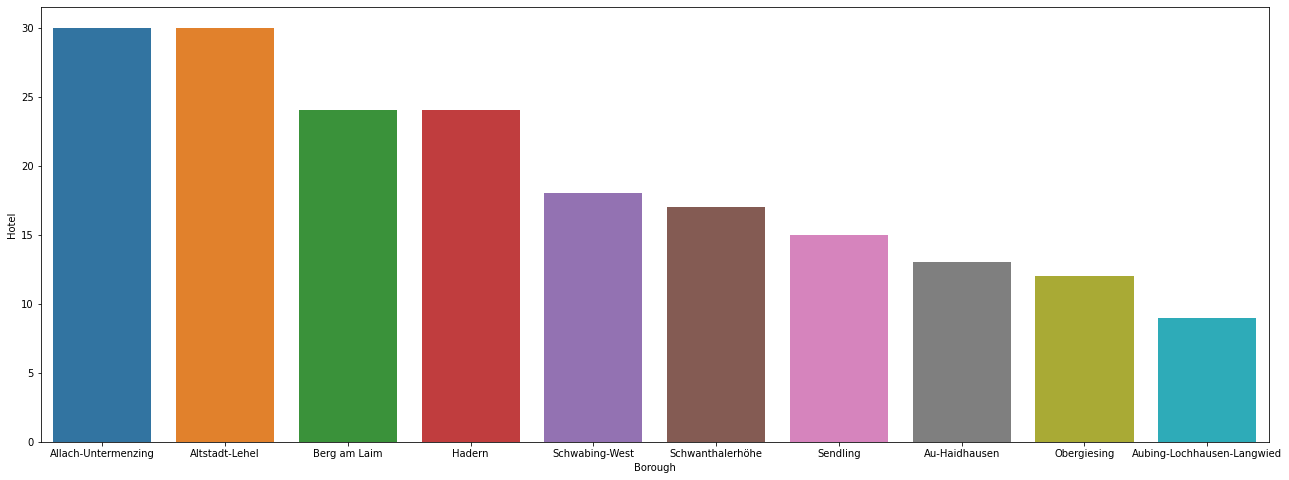

In [255]:
plt.figure(figsize=(22,8))
plt.xticks()
sns.barplot(x="Borough",y="Hotel",data=hotels_per_borough.nlargest(10,"Hotel"))

__We will narrow our analysis to the "Altstadt-Lehel" Bouroug as it is in the center and many hotels are near to each other__

__Creating a new dataframe with the hotels in the "Altstadt-Lehel" borough__

In [362]:
top_munich_hotels = munich_hotels[munich_hotels["Borough"]=="Altstadt-Lehel"]

In [363]:
top_munich_hotels.shape

(30, 7)

In [364]:
top_munich_hotels.reset_index(drop=True, inplace=True)

__Let's create a new map for Munich and add the hotels into it__

In [365]:
# create map of New York using latitude and longitude values
map_munich_hotels = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, Hotel,Borough in zip(top_munich_hotels['Hotel Latitude'], top_munich_hotels['Hotel Longitude'], 
                           top_munich_hotels['Hotel'],top_munich_hotels["Borough"]):
    label = '{},{}'.format(Hotel,Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich_hotels)  
    
map_munich_hotels

In [366]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,Hotel
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,Hotel
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,Hotel
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,Hotel
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,Hotel


__Let's drop the Hotel category column since it will not be in use__

In [367]:
top_munich_hotels.drop("Hotel Category",axis=1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [368]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779


__After Specifying the hotels in our scope, we start looking at the laundries within radius of 300m from each hotel__

__We found out from Foursquare API that the laudries category ID is 4bf58dd8d48988d1fc941735 and dry cleaning service category ID is 52f2ab2ebcbc57f1066b8b1d__

__Let's explore the laundries for one of the hotels__

In [370]:
categoryid= '4bf58dd8d48988d1fc941735,52f2ab2ebcbc57f1066b8b1d' # Category ID for the hotels
radius=300
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    top_munich_hotels.iloc[10,:]["Hotel Latitude"], 
    top_munich_hotels.iloc[10,:]["Hotel Longitude"], 
    radius, 
    categoryid)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH&client_secret=5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV&v=20180605&ll=48.134737863819076,11.566868805604386&radius=300&categoryId=4bf58dd8d48988d1fc941735,52f2ab2ebcbc57f1066b8b1d'

In [371]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '605668f90df4b06aec0e9dc3'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Hackenviertel',
  'headerFullLocation': 'Hackenviertel, Munich',
  'headerLocationGranularity': 'neighborhood',
  'query': 'laundry',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 48.13743786651908,
    'lng': 11.570906920000244},
   'sw': {'lat': 48.13203786111907, 'lng': 11.562830691208529}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d83102440a7a35db26ceebd',
       'name': 'Die Reinigung',
       'location': {'address': 'Sendlinger-Tor-Platz 10',
        'lat': 48.13388491578233,
        'lng': 11.566511624451877,
 

In [372]:
laundry = results['response']['groups'][0]['items']
    
nearby_laundry = json_normalize(laundry) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_laundry =nearby_laundry.loc[:, filtered_columns]

# filter the category for each row
nearby_laundry['venue.categories'] = nearby_laundry.apply(get_category_type, axis=1)

# clean columns
nearby_laundry.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_laundry.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Die Reinigung,Dry Cleaner,48.133885,11.566512


__Let's write a function to apply the same for all hotels__

In [373]:
def getNearbyLaundries(names, latitudes, longitudes):
    
    laundry_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=300&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        categoryid)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        laundry_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_laundries = pd.DataFrame([item for laundry_list in laundry_list for item in laundry_list])
    nearby_laundries.columns = ['Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Laundry', 
                  'Laundry Latitude', 
                  'Laundry Longitude', 
                  'Laundry Category']
    
    return(nearby_laundries)

In [374]:
munich_laundry = getNearbyLaundries(names=top_munich_hotels["Hotel"],
                                   latitudes=top_munich_hotels['Hotel Latitude'],
                                   longitudes=top_munich_hotels['Hotel Longitude']
                                   
                                  )

Hotel Bayerischer Hof
Cortiina Hotel
Hotel Vier Jahreszeiten Kempinski
Louis Hotel
Mandarin Oriental Munich
Platzl Hotel
The Charles Hotel
Hotel Schlicker „Zum Goldenen Löwen“
Hotel Torbräu
Deutsche Eiche
Motel One München-Sendlinger Tor
Derag Livinghotel Am Viktualienmarkt
Sofitel Munich Bayerpost
25hours Hotel The Royal Bavarian
marc münchen
Maximilian Munich Apartments & Hotel
Hotel Eder
Mercure Hotel München City Center
Hotel Lux
The Flushing Meadows
Mercure Hotel München Altstadt
Aloft Munich
Le Méridien München
Hotel Olympic
Hotel Kraft
EUROSTARS Book Hotel
Hotel Excelsior
Atrium Hotel München
Hotel Cocoon Hauptbahnhof
City Partner Hotel Adria


In [375]:
munich_laundry

,Hotel,Hotel Latitude,Hotel Longitude,Laundry,Laundry Latitude,Laundry Longitude,Laundry Category
0,Cortiina Hotel,48.136804,11.579450,Stark Reinigung,48.137173,11.580919,Dry Cleaner
1,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,Stark Reinigung,48.137173,11.580919,Dry Cleaner
2,Louis Hotel,48.135792,11.575963,Fred Butler,48.134478,11.573124,Laundry Service
3,Mandarin Oriental Munich,48.137257,11.580779,Stark Reinigung,48.137173,11.580919,Dry Cleaner
4,Platzl Hotel,48.137823,11.578919,Stark Reinigung,48.137173,11.580919,Dry Cleaner
5,The Charles Hotel,48.142935,11.562526,Textilreinigung Jaroslav,48.145132,11.560454,Laundry Service
6,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,Stark Reinigung,48.137173,11.580919,Dry Cleaner
7,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,Änderungsschneidere und Reinigungsannahme Karim,48.133457,11.579163,Tailor Shop
8,Hotel Torbräu,48.135470,11.581453,Stark Reinigung,48.137173,11.580919,Dry Cleaner
9,Hotel Torbräu,48.135470,11.581453,Alfa Reinigung,48.133444,11.583202,Dry Cleaner


__Let's check the number of laundries withing 300m radius from the hotles__

In [377]:
munich_laundry.groupby("Hotel")["Laundry"].count()

Hotel
25hours Hotel The Royal Bavarian        1
Aloft Munich                            3
Atrium Hotel München                    3
City Partner Hotel Adria                1
Cortiina Hotel                          1
Derag Livinghotel Am Viktualienmarkt    3
Deutsche Eiche                          2
EUROSTARS Book Hotel                    3
Hotel Cocoon Hauptbahnhof               3
Hotel Eder                              2
Hotel Excelsior                         2
Hotel Lux                               1
Hotel Olympic                           2
Hotel Schlicker „Zum Goldenen Löwen“    2
Hotel Torbräu                           3
Hotel Vier Jahreszeiten Kempinski       1
Le Méridien München                     4
Louis Hotel                             1
Mandarin Oriental Munich                1
Maximilian Munich Apartments & Hotel    1
Mercure Hotel München Altstadt          1
Mercure Hotel München City Center       1
Motel One München-Sendlinger Tor        1
Platzl Hotel                

__Let's check how many hotels have laundries around them__

In [378]:
len(munich_laundry.groupby("Hotel")["Laundry"].count())

28

__Let's add the laundries to the map of hotel we created previously__

In [387]:
for lat, lng, Laundry in zip(munich_laundry['Laundry Latitude'], munich_laundry['Laundry Longitude'], 
                           munich_laundry['Laundry']):
    label = '{}'.format(Laundry)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich_hotels)  

In [388]:
map_munich_hotels

__Let's cerate a dataframe that contains the hotel names and the number of laundries around them__

In [381]:
laundry_hotel = munich_laundry.groupby("Hotel")["Laundry"].count().to_frame().reset_index()

In [382]:
laundry_hotel.head()

,Hotel,Laundry
0,25hours Hotel The Royal Bavarian,1
1,Aloft Munich,3
2,Atrium Hotel München,3
3,City Partner Hotel Adria,1
4,Cortiina Hotel,1


In [383]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779


In [385]:
top_munich_hotels_laundry = top_munich_hotels.merge(laundry_hotel,how="left",right_on="Hotel",left_on="Hotel")

In [389]:
top_munich_hotels_laundry.fillna(0,inplace=True)

In [390]:
top_munich_hotels_laundry

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Laundry
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,0.0
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,1.0
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,1.0
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,1.0
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,1.0
5,Altstadt-Lehel,48.137828,11.574582,Platzl Hotel,48.137823,11.578919,1.0
6,Altstadt-Lehel,48.137828,11.574582,The Charles Hotel,48.142935,11.562526,1.0
7,Altstadt-Lehel,48.137828,11.574582,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,2.0
8,Altstadt-Lehel,48.137828,11.574582,Hotel Torbräu,48.135470,11.581453,3.0
9,Altstadt-Lehel,48.137828,11.574582,Deutsche Eiche,48.132738,11.576229,2.0


### Clustering the Hotels 

In the folloiwng cells we will apply KMeans clustering on the above dataframe and we will do some further analysis.

In [391]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler